# Communicate Data Findings (Dataset: Loan Data from Prosper)

**By: Jalal Tareen**

### Overview
I looked at the characteristics of loans that could be used to predict their borrower APR in this investigation. Original loan amount, borrower's Prosper rating, loan term, borrower's stated monthly income were the main focus.

### Dataset Overview
The dataset consisted of borrower APRs and attributes of 113,937 loans. The attributes included original loan amount, borrower's Prosper rating, loan term, borrower's stated monthly income, as well as many other features such as borrower's employment status, debt to income ratio, current loan status etc. 352 data points were removed from the analysis due to very large stated monthly income seemed as outliers and missing borrower APR information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import nbconvert
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')
# Subset the dataframe by selecting features of interest
cols = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 
        'EmploymentStatus']
loan_sub = loan[cols]
# data wrangling, remove loans with missing borrower APR information
loan_sub = loan_sub[~loan_sub.BorrowerAPR.isna()]
# data wrangling, remove loans with stated monthly income greater than 30k, which are outliers
loan_sub = loan_sub[loan_sub.StatedMonthlyIncome<=30000]
# Convert ProsperRating and Employment status into ordered categorical types
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
loan_sub['ProsperRating (Alpha)'] = loan_sub['ProsperRating (Alpha)'].astype(ordered_var)

emp_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = emp_order)
loan_sub['EmploymentStatus'] = loan_sub['EmploymentStatus'].astype(ordered_var)
loan_sub.shape

(113585, 6)

## Distribution of Borrower APR:

The distribution of APR looks multimodal. It has small peak centered at 0.1 and 0.3, a large peak centered at 0.2.There is a sharpe peak between 0.35 and 0.36. We can see only few loans have APR greater than 0.43.

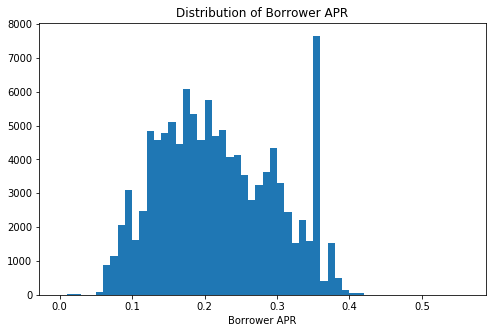

In [3]:
bins = np.arange(0, loan_sub.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = loan_sub, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');
plt.title('Distribution of Borrower APR');

## Distribution of Original Loan Amount:

From the graph below we can see that the most loans are multiples of 1k, Frequency of multiples of 5k loans are much more than others. 

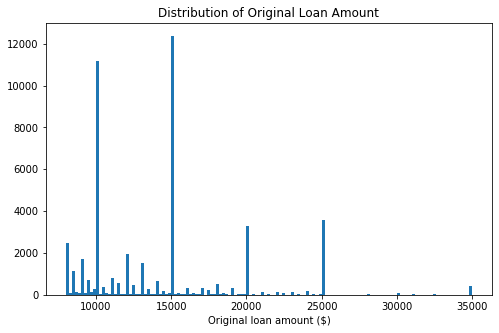

In [4]:
bins = np.arange(8000, loan_sub.LoanOriginalAmount.max()+200, 200)
plt.figure(figsize=[8, 5])
plt.hist(data = loan_sub, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Original loan amount ($)');
plt.title('Distribution of Original Loan Amount');

## Borrower APR vs. Loan Amount:
At different size of the loan amount, the APR has a large range, but the range of APR decrease with the increase of loan amount.  This shows that with larger amount Borrower APR decreases.

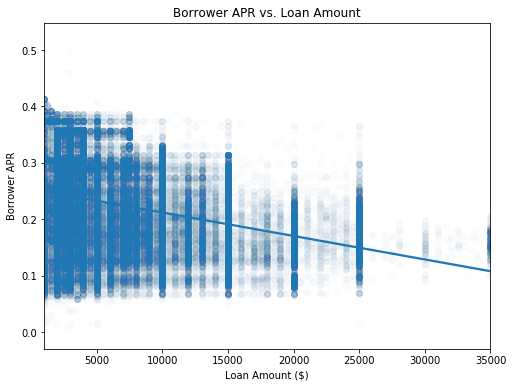

In [5]:
plt.figure(figsize = [8, 6])
sb.regplot(data = loan_sub, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});
plt.xlabel('Loan Amount ($)')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Loan Amount');

## Borrower APR vs. Prosper Rating:
The borrower APR decreases with the increasingly better rating. Borrowers with the best Prosper ratings have the lowest APR. It means that the Prosper rating has a strong effect on borrower APR.

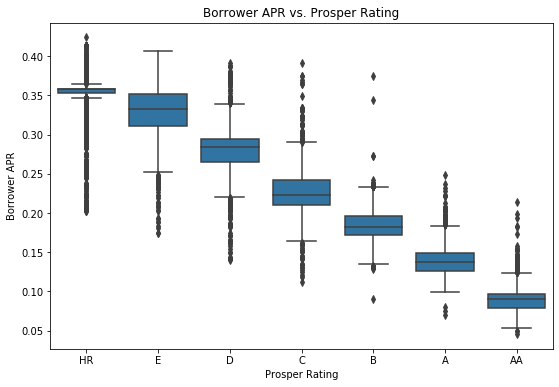

In [6]:
plt.figure(figsize=[9,6])
default_color = sb.color_palette()[0]
sb.boxplot(data=loan_sub, x='ProsperRating (Alpha)', y='BorrowerAPR', color=default_color)
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Prosper Rating');

## Borrower APR by Rating and Term:

Interestingly, the borrower APR decrease with the increase of borrow term for people with HR-C ratings. But for people with B-AA ratings, the APR increase with the increase of borrow term.

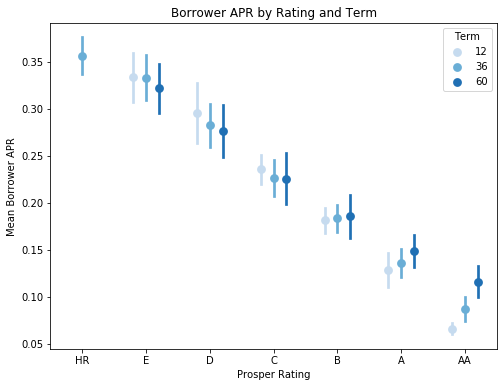

In [7]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loan_sub, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
plt.xlabel('Prosper Rating')
plt.title('Borrower APR by Rating and Term');

In [8]:
!jupyter nbconvert "slide_deck.ipynb" --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook slide_deck.ipynb to slides
[NbConvertApp] Writing 500975 bytes to slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\USER\anaconda3\lib\site-packages\jupyter_core\application.py", line 268, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\USER\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\USER\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\USER\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\USER\anacond